In [8]:
import pandas as pd 

import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.ensemble import RandomForestClassifier

import cleaner as dc


In [4]:
df = pd.read_csv('data/balanced_emotional_appeal_dataset.csv')
df

,ad,emotion
0,tea with starr and a friend feel free to post ...,0
1,defamedtoo click the link below to sign the pe...,0
2,something to think about,0
3,levy et al j am coll cardiol conducted a prosp...,0
4,tag your friends and family below and ask them...,0
...,...,...
7138,i am running for congress to return the govern...,1
7139,welcome to my facebook page im john anderson i...,1
7140,this is it the end of a decade tonight in time...,1
7141,we are looking for people with ankylosing spon...,1


In [5]:
# Lower case
df['ad']= df['ad'].apply(lambda x: x.lower())

# Removing punctuations
df['ad']= df['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df['ad']= df['ad'].str.replace('\d+','',regex=True)

# Removing extra space 
df['ad']= df['ad'].str.replace('\s+', ' ',  regex=True)

#Apply denoise function
df['ad']= df['ad'].apply(dc.denoise_text)

#Apply function on review column
df['ad']= df['ad'].apply(dc.remove_stopwords)

#Apply function on review column
df['ad']= df['ad'].apply(dc.remove_special_characters)

#Apply function on review column
df['ad']= df['ad'].apply(dc.simple_stemmer)

In [6]:
X_train,  X_test, y_train, y_test  = train_test_split(df['ad'], df['emotion'], test_size =0.1  , random_state = 42)

In [7]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train = tf_vectorizer.fit_transform(X_train)
X_test = tf_vectorizer.transform(X_test)

In [9]:
# Creating and training  the model 
clf = RandomForestClassifier(
    n_estimators = 200, 
    criterion = 'gini',
    oob_score = True
)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, oob_score=True)

accuracy:   0.902
              precision    recall  f1-score   support

non positive       0.88      0.91      0.90       335
    positive       0.92      0.89      0.91       380

    accuracy                           0.90       715
   macro avg       0.90      0.90      0.90       715
weighted avg       0.90      0.90      0.90       715

confusion matrix:
[[306  29]
 [ 41 339]]



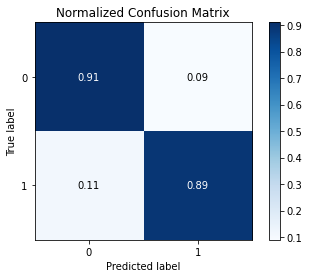

In [10]:
# predict the labels on validation dataset
predictions = clf.predict(X_test)

# compute the performance measures
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['non positive', 'positive']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()

In [11]:
df_val = pd.read_csv('data/sample.csv')

# Lower case
df_val['ad']= df_val['ad'].apply(lambda x: x.lower())

# Removing punctuations
df_val['ad']= df_val['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df_val['ad']= df_val['ad'].str.replace('\d+','', regex=True)

# Removing extra space 
df_val['ad']= df_val['ad'].str.replace('\s+', ' ', regex=True)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.remove_stopwords)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.denoise_text)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.remove_special_characters)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.simple_stemmer)

accuracy:   0.836
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        40
           1       0.91      0.88      0.89       131

    accuracy                           0.84       171
   macro avg       0.77      0.79      0.78       171
weighted avg       0.84      0.84      0.84       171

confusion matrix:
[[ 28  12]
 [ 16 115]]



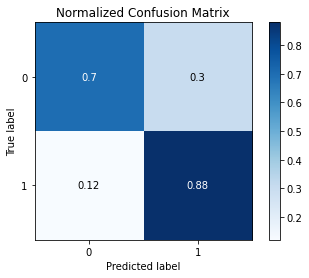

In [12]:
X_val_tf = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['emotion']
predictions = clf.predict(X_val_tf)

# compute the performance measures
score = metrics.accuracy_score(y_val, predictions)
print("accuracy:   %0.3f" % score)


print(metrics.classification_report(y_val, predictions, target_names=['0', '1']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_val, predictions, normalize=True)
plt.show()